<a href="https://colab.research.google.com/github/NDDV/Bitcoins-Predict-using-RNN/blob/main/bitcoins_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import Library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
plt.style.use("ggplot")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML + DL/Predict_bitcoin_price/bitcoins.csv")

In [ ]:
df.head()

,Unix_Timestamp,DateTime,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,12/31/2011 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325346600,12/31/2011 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,1325350740,12/31/2011 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,1325350800,12/31/2011 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,1325391360,01/01/2012 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [ ]:
df = df.set_index("DateTime")[['Close']].tail(1000)
df = df.set_index(pd.to_datetime(df.index))

In [ ]:
df

,Close
DateTime,
2020-09-13 07:07:00,10530.27
2020-09-13 07:08:00,10525.47
2020-09-13 07:09:00,10533.51
2020-09-13 07:10:00,10530.18
2020-09-13 07:11:00,10536.27
...,...
2020-09-13 23:56:00,10325.89
2020-09-13 23:57:00,10331.97
2020-09-13 23:58:00,10331.47


In [ ]:
# Normalizing/Scaling the Data
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

In [ ]:
df

,Close
DateTime,
2020-09-13 07:07:00,0.904826
2020-09-13 07:08:00,0.890889
2020-09-13 07:09:00,0.914233
2020-09-13 07:10:00,0.904564
2020-09-13 07:11:00,0.922246
...,...
2020-09-13 23:56:00,0.311422
2020-09-13 23:57:00,0.329075
2020-09-13 23:58:00,0.327623


In [ ]:
def split_sequence(seq, n_steps_in, n_steps_out):
    X, y = [], []
    
    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        if out_end > len(seq):
            break
        
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [ ]:
n_per_in  = 30

n_per_out = 10

n_features = 1

X_train, y_train = split_sequence(list(df.Close), n_per_in, n_per_out)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

In [ ]:
model = keras.Sequential(name="Simple_RNN")
model.add(layers.Embedding(input_dim=n_per_in, output_dim=n_per_out))

model.add(layers.SimpleRNN(256, activation='tanh'))

model.add(layers.Dense(n_per_out, activation='tanh'))

for i,layer in enumerate(model.layers):
  layer._name = 'layer_' + str(i)

model.summary()

Model: "Simple_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Embedding)         (None, None, 10)          300       
                                                                 
 layer_1 (SimpleRNN)         (None, 256)               68352     
                                                                 
 layer_2 (Dropout)           (None, 256)               0         
                                                                 
 layer_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 71,222
Trainable params: 71,222
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = keras.models.Sequential(name="LSMT")

model.add(keras.layers.LSTM(32, activation="ReLU",return_sequences=True, input_shape=(n_per_in, n_features)))
model.add(keras.layers.Dropout(0.3))

for i in range(6):
  model.add(keras.layers.LSTM(32, activation="ReLU",return_sequences=True))
  model.add(keras.layers.Dropout(0.3))


model.add(keras.layers.LSTM(16, activation="ReLU"))


model.add(keras.layers.Dense(10))

model.add(keras.layers.Activation("ReLU"))

for i,layer in enumerate(model.layers):
  layer._name = 'layer_' + str(i)


model.summary()

Model: "LSMT"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (LSTM)              (None, 30, 32)            4352      
                                                                 
 layer_1 (Dropout)           (None, 30, 32)            0         
                                                                 
 layer_2 (LSTM)              (None, 30, 32)            8320      
                                                                 
 layer_3 (Dropout)           (None, 30, 32)            0         
                                                                 
 layer_4 (LSTM)              (None, 30, 32)            8320      
                                                                 
 layer_5 (Dropout)           (None, 30, 32)            0         
                                                                 
 layer_6 (LSTM)              (None, 30, 32)            8320   

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate = 1e-3, decay= 1e-6)

model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, y_train ,  epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
27/27 [==============================] - 10s 113ms/step - loss: 0.1969 - accuracy: 0.0729 - val_loss: 0.0525 - val_accuracy: 0.0722
Epoch 2/100
27/27 [==============================] - 2s 70ms/step - loss: 0.1523 - accuracy: 0.0718 - val_loss: 0.0430 - val_accuracy: 0.0722
Epoch 3/100
27/27 [==============================] - 2s 69ms/step - loss: 0.1310 - accuracy: 0.0683 - val_loss: 0.0396 - val_accuracy: 0.0722
Epoch 4/100
27/27 [==============================] - 2s 68ms/step - loss: 0.1226 - accuracy: 0.0914 - val_loss: 0.0404 - val_accuracy: 0.2062
Epoch 5/100
27/27 [==============================] - 2s 71ms/step - loss: 0.1203 - accuracy: 0.1204 - val_loss: 0.0393 - val_accuracy: 0.2062
Epoch 6/100
27/27 [==============================] - 2s 68ms/step - loss: 0.1207 - accuracy: 0.1250 - val_loss: 0.0401 - val_accuracy: 0.2062
Epoch 7/100
27/27 [==============================] - 2s 68ms/step - loss: 0.1190 - accuracy: 0.1262 - val_loss: 0.0400 - val_accuracy: 0.2062
Epoc

In [ ]:
def visualize_training_results(results):
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

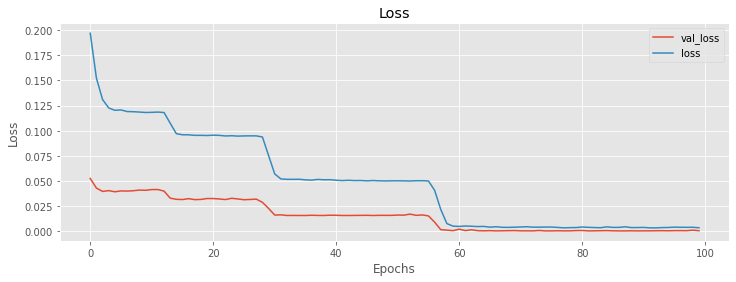

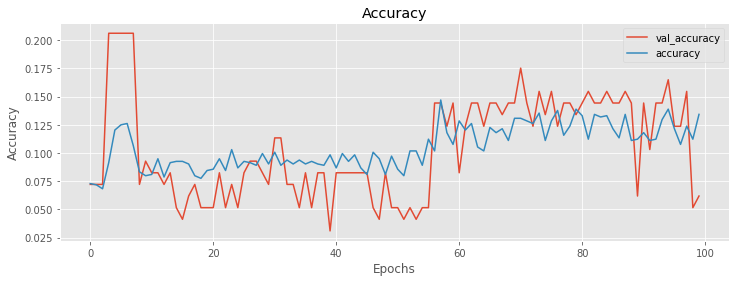

In [ ]:
visualize_training_results(history)

Predicted Prices:
 [[10312.483693299888], [10312.228106854556], [10311.74843576312], [10311.48039846003], [10312.228342938422], [10312.431806172131], [10311.585804773567], [10311.278413316606], [10311.448947983383], [10311.857588624953]]

Actual Prices:
 [[10320.06], [10320.63], [10320.78], [10323.64], [10323.28], [10325.89], [10331.97], [10331.47], [10334.78], [10332.37]]


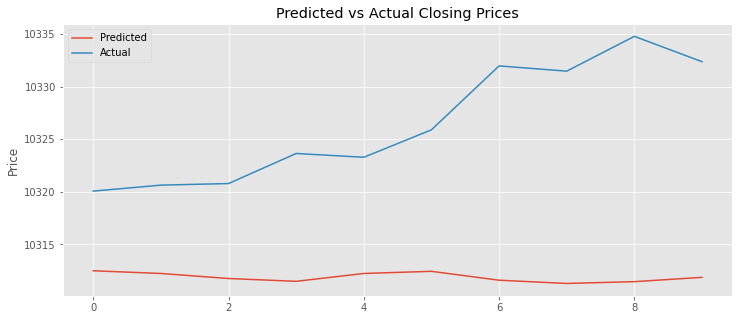

In [ ]:
plt.figure(figsize=(12,5))

yhat = model.predict(X_train[-1].reshape(1, n_per_in, n_features)).tolist()[0]

yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

actual = scaler.inverse_transform(y_train[-1].reshape(-1,1))

print("Predicted Prices:\n", yhat)
plt.plot(yhat, label='Predicted')

print("\nActual Prices:\n", actual.tolist())
plt.plot(actual.tolist(), label='Actual')

plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1, n_per_in, n_features)).tolist()[0]

yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

preds = pd.DataFrame(yhat, index=pd.date_range(start=df.index[-1], periods=len(yhat), freq="D"), columns=df.columns)

print(preds)

pers = 10

actual = pd.DataFrame(scaler.inverse_transform(df[["Close"]].tail(pers)), index=df.Close.tail(pers).index, columns=df.columns).append(preds.head(1))

plt.figure(figsize=(16,6))
plt.plot(actual, label="Actual Prices")
plt.plot(preds, label="Predicted Prices")
plt.ylabel("Price")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(yhat)} days")
plt.legend()
plt.show()